In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [9]:
ether = pd.read_csv('./dataset/ether/Ethereum Historical Data.csv')
ether.head()

,Date,Open,High,Low,Close,Volume
0,2016-03-10,11.20,11.85,11.07,11.75,4
1,2016-03-11,11.75,11.95,11.75,11.95,179
2,2016-03-12,11.95,13.45,11.95,12.92,833
3,2016-03-13,12.92,15.07,12.92,15.07,1295
4,2016-03-14,15.07,15.07,11.40,12.50,92183


In [10]:
na_count = ether.isna().sum().sum()
print(f'Etherium has {na_count} nan value(s)')

Etherium has 0 nan value(s)


In [12]:
# inspect types of each column
ether.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [13]:
# convert Date field to Date time and sort by Date
ether['Date'] = pd.to_datetime(ether['Date'])
ether.sort_values(by='Date',inplace=True)

In [14]:
# verify
ether.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [15]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

/var/folders/88/d1_fkwcn39qc8xtcqrlwmh6h0000gn/T/ipykernel_75892/2826890715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


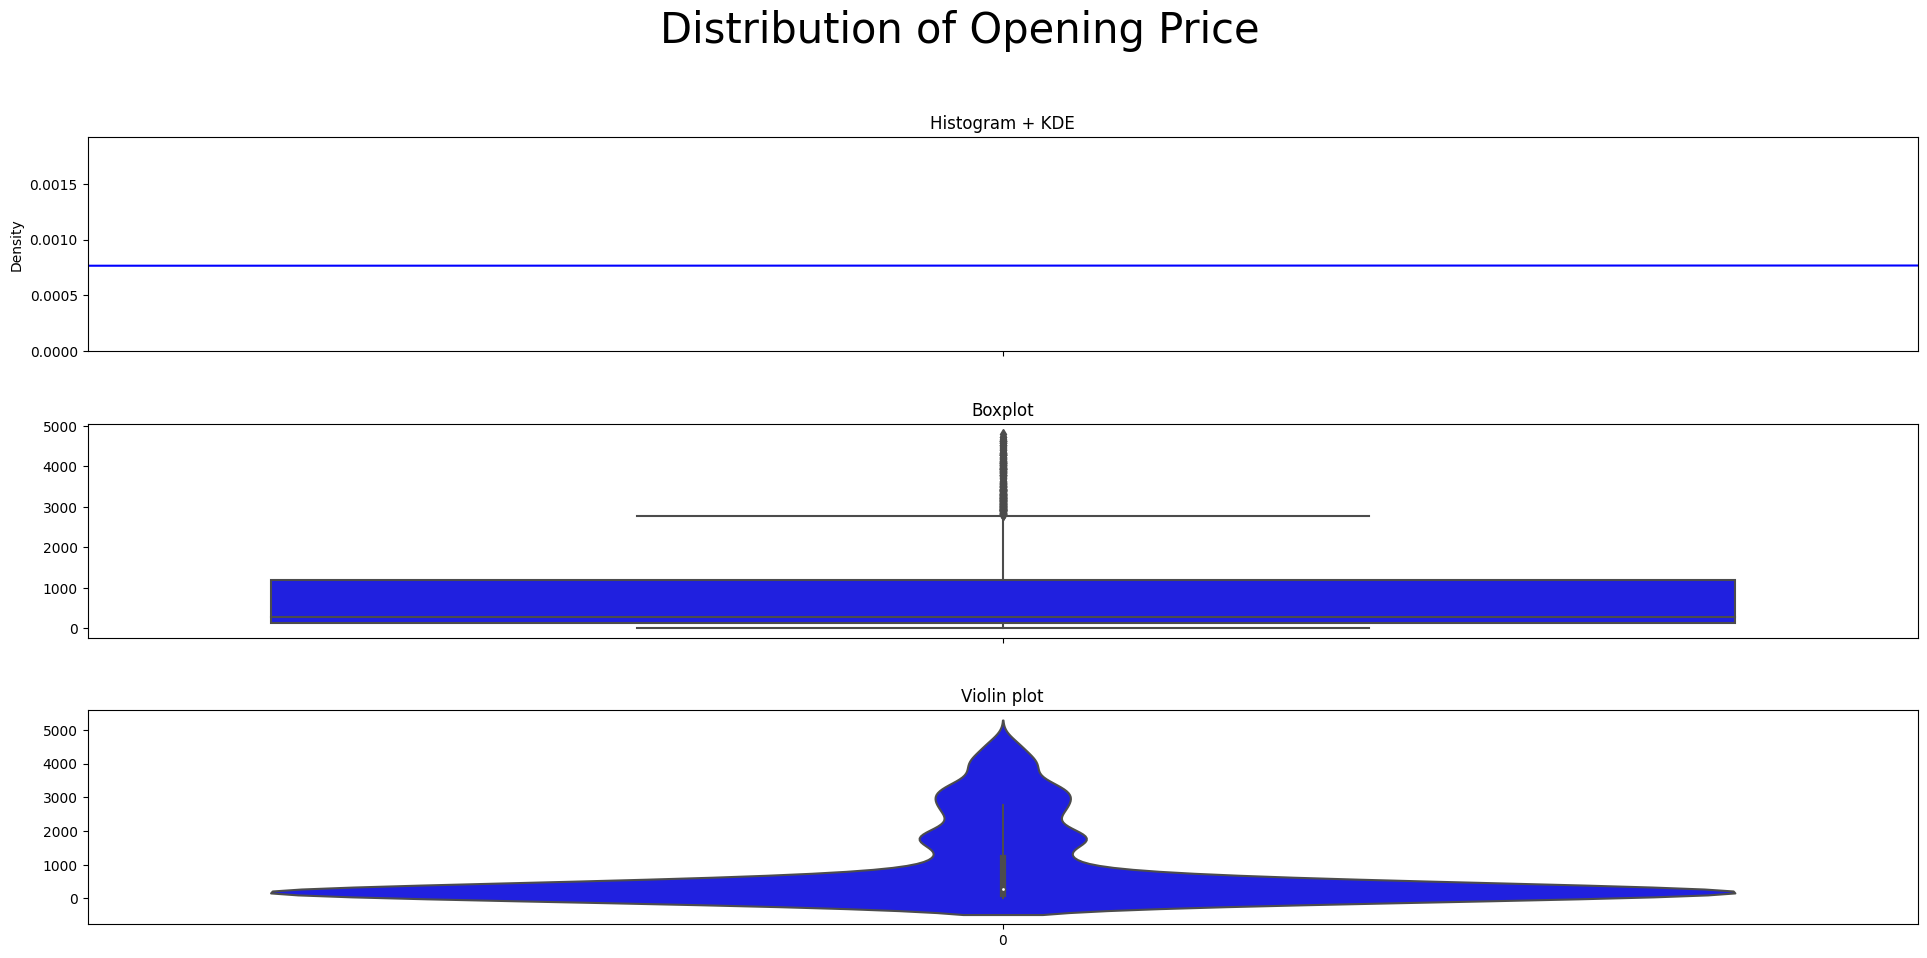

In [16]:
triple_plot(ether['Open'], 'Distribution of Opening Price', 'blue')

/var/folders/88/d1_fkwcn39qc8xtcqrlwmh6h0000gn/T/ipykernel_75892/2826890715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


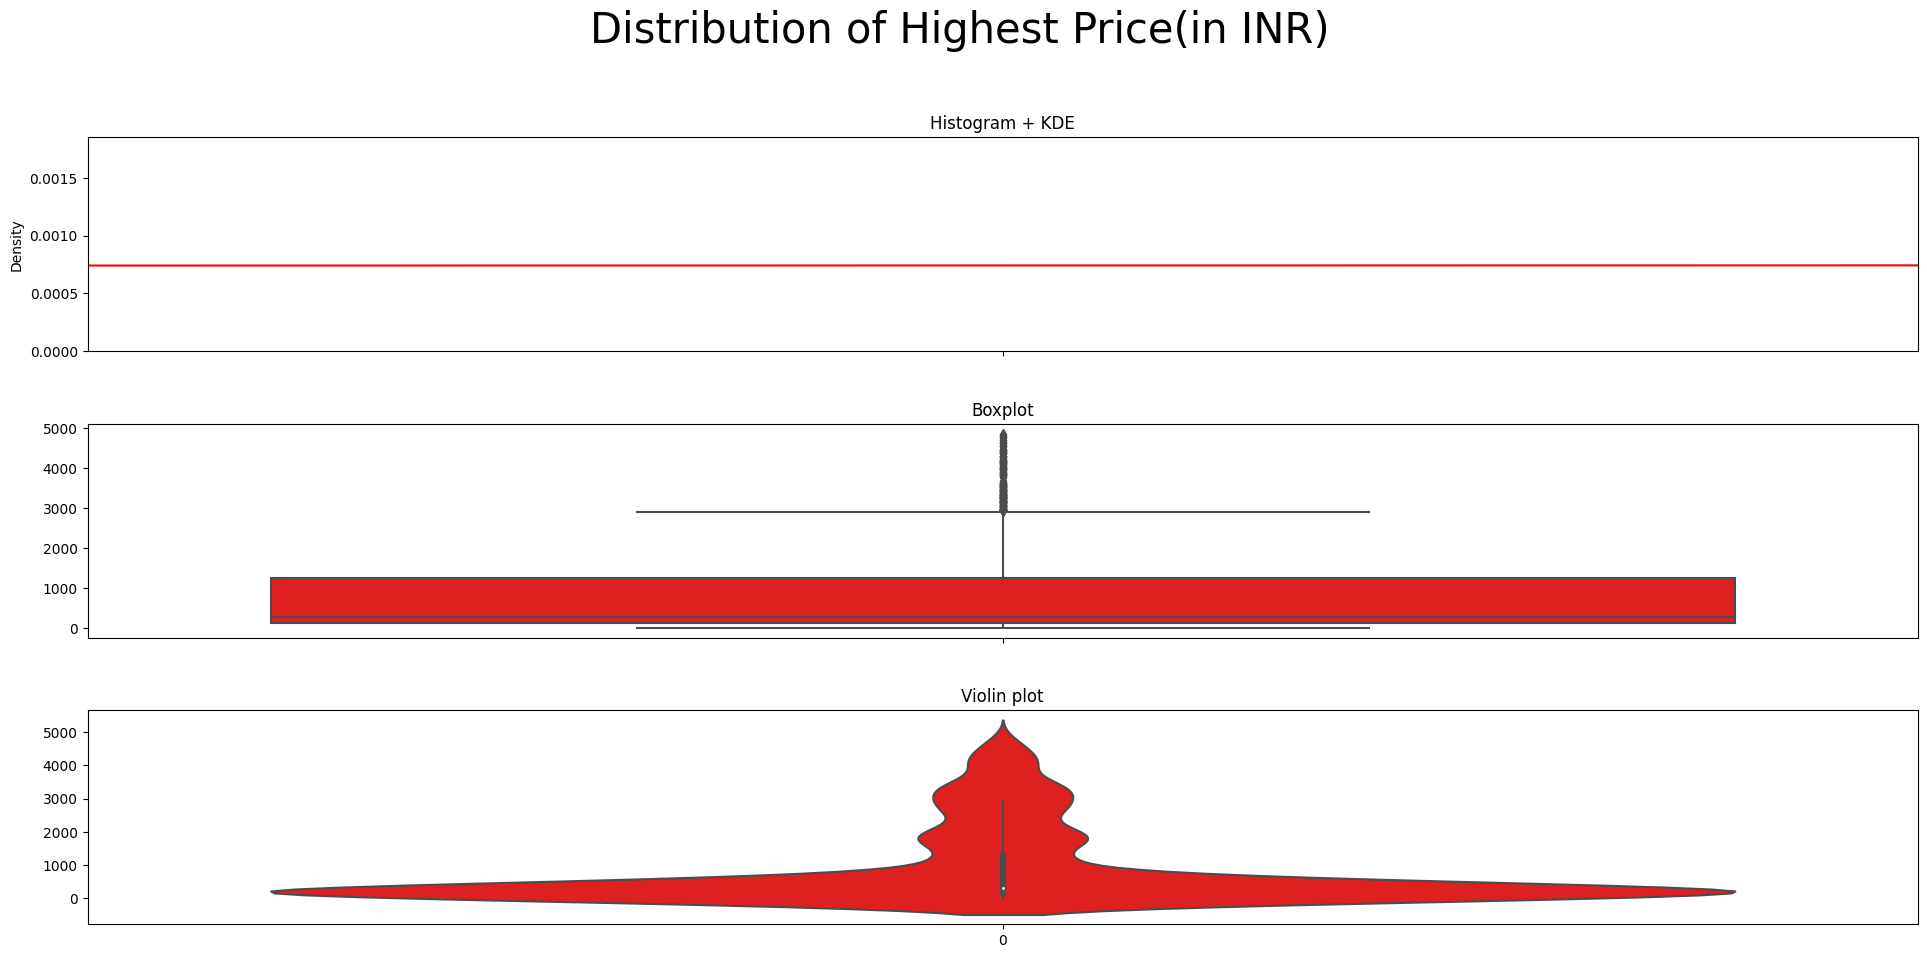

In [17]:
triple_plot(ether['High'],'Distribution of Highest Price(in INR)', 'Red')

/var/folders/88/d1_fkwcn39qc8xtcqrlwmh6h0000gn/T/ipykernel_75892/2826890715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


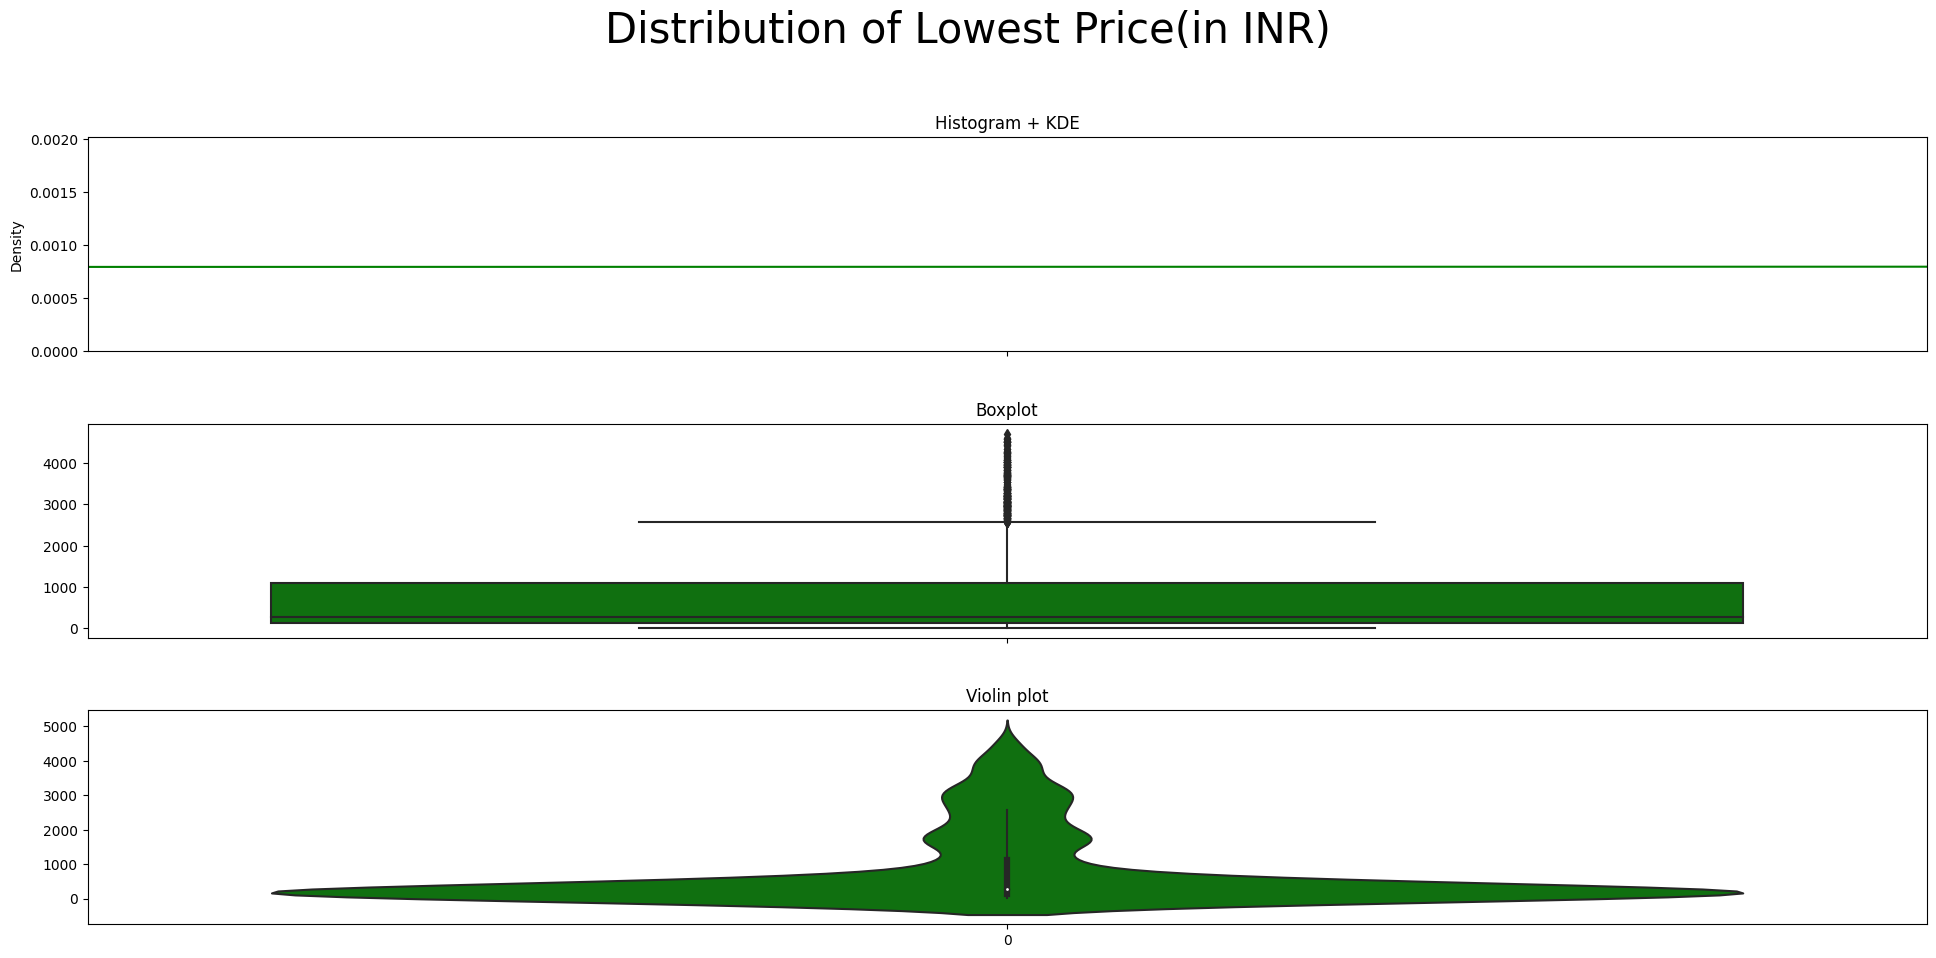

In [18]:
triple_plot(ether['Low'],'Distribution of Lowest Price(in INR)', 'Green')

/var/folders/88/d1_fkwcn39qc8xtcqrlwmh6h0000gn/T/ipykernel_75892/2826890715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


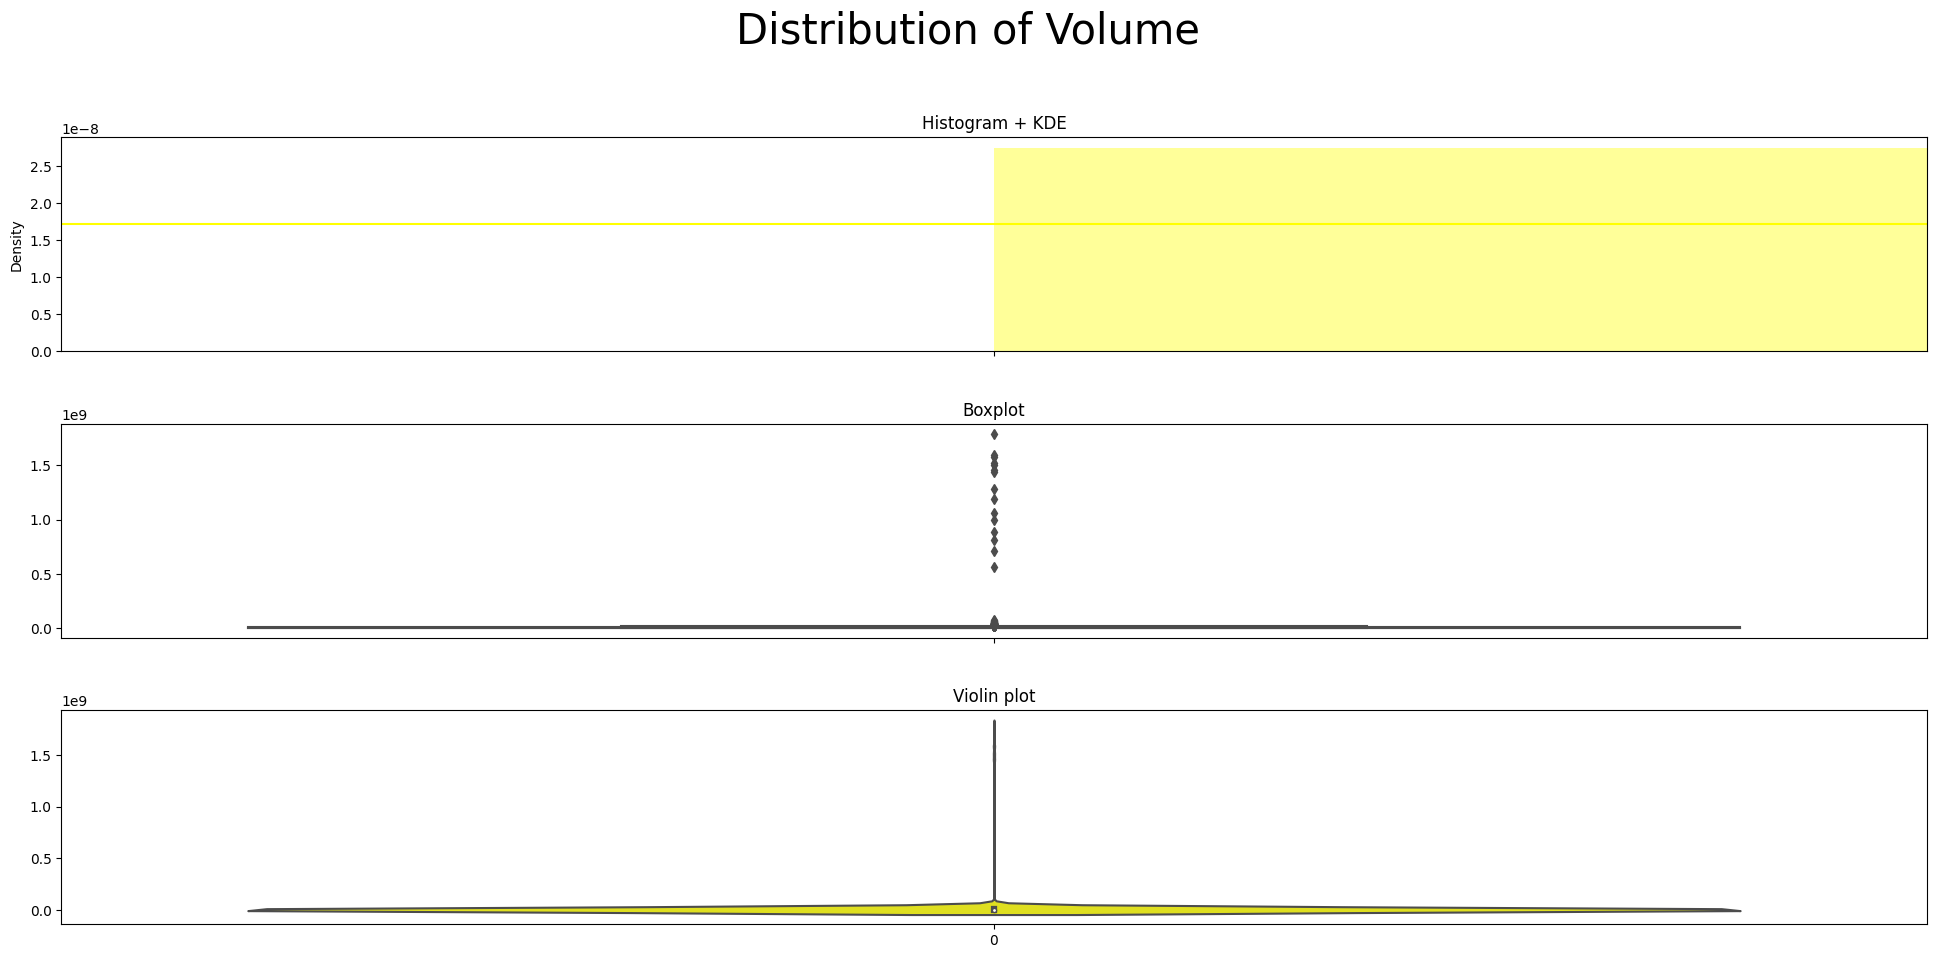

In [19]:
triple_plot(ether['Volume'],'Distribution of Volume','yellow')

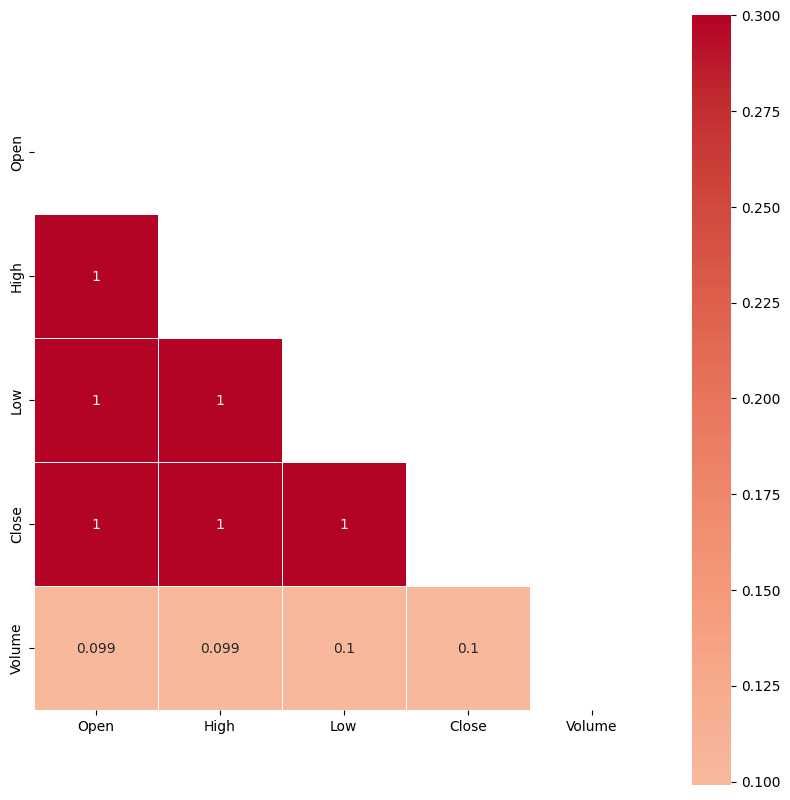

In [20]:
plt.figure(figsize=(10,10))
corr=ether[ether.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(ether[ether.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()